# PREPROCESSING AND MODELING PROCESS

In [1]:
import pandas as pd
import json
import ast
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data_aux = pd.read_csv("full_data.csv")
df_data_aux.shape

(44228, 47)

In [3]:
df_data_aux

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,main_team_rk,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed
0,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,A,Reims,...,1.0,5.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
1,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,H,Amiens SC,...,5.0,1.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
2,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,A,Monaco,...,2.0,5.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
3,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,H,Bordeaux,...,5.0,2.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
4,10330211,Ligue 1,18-19,12935,3.0,2018-08-26 13:00:00,1,7,A,Guingamp,...,5.0,2.0,"[{'id': 690, 'sport_id': 1, 'country_id': 17, ...","[{'id': 3787449, 'fixture_id': 10330211, 'type...","[{'id': 32407050, 'fixture_id': 10330211, 'per...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44223,19167985,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Reggiana,...,14.0,2.0,"[{'id': 2892, 'sport_id': 1, 'country_id': 251...","[{'id': 356436184, 'fixture_id': 19167985, 'ty...","[{'id': 149684317, 'fixture_id': 19167985, 'pe...",76.0,16.48,56.0,17.12,2.55
44224,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,A,Südtirol,...,12.0,15.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44225,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Salernitana,...,15.0,12.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44226,19167987,Serie B,24-25,23839,33.0,2025-04-12 15:15:00,9,6,A,Cittadella,...,12.0,14.0,"[{'id': 8485, 'sport_id': 1, 'country_id': 251...","[{'id': 356956919, 'fixture_id': 19167987, 'ty...","[{'id': 149693032, 'fixture_id': 19167987, 'pe...",47.0,18.89,68.0,19.95,5.58


In [4]:
df_stats = pd.read_csv("df_all_data_statistics.csv")
df_stats

,fixture_id,local_red_cards,away_red_cards,local_yellow_cards,away_yellow_cards,local_goals,away_goals,local_possession,away_possession,local_corners,away_corners,goals_diff
0,10329241,0.0,0.0,1.0,1.0,1.0,0.0,50.000000,50.000000,3.000000,4.000000,1.0
1,10329239,1.0,1.0,2.0,5.0,0.0,1.0,52.000000,48.000000,3.000000,2.000000,-1.0
2,10329242,0.0,0.0,1.0,3.0,3.0,1.0,50.000000,50.000000,5.000000,1.000000,2.0
3,10329243,0.0,0.0,0.0,1.0,0.0,0.0,55.000000,45.000000,7.000000,1.000000,0.0
4,10329240,0.0,0.0,2.0,1.0,1.0,3.0,61.000000,39.000000,4.000000,5.000000,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33212,19129777,0.0,0.0,0.0,0.0,0.0,0.0,48.333333,38.500000,4.933333,3.875000,0.0
33213,19145090,0.0,0.0,0.0,0.0,0.0,0.0,56.578947,45.315789,6.736842,4.263158,0.0
33214,19135032,0.0,0.0,0.0,0.0,0.0,0.0,52.722222,56.833333,4.888889,7.000000,0.0
33215,19135034,0.0,0.0,0.0,0.0,0.0,0.0,43.166667,46.777778,4.833333,3.611111,0.0


In [5]:
df_stats["local_red_cards"] = df_stats["local_red_cards"].fillna(0).astype(int)
df_stats["away_red_cards"] = df_stats["away_red_cards"].fillna(0).astype(int)  #IF IS NAN IS 0. IT HAS BEEN PROVED

df_stats["red_cards_diff"] = df_stats["local_red_cards"] - df_stats["away_red_cards"]

## WE JUST GET THE HOME VS AWAY DATA AND REMOVE DUPLICATES

In [6]:
# df_data_aux = df_data_aux[df_data_aux["side"]=="H"]
# df_data_aux.shape

In [7]:
# Merge the dataframes
df_data = pd.merge(df_data_aux, df_stats[['fixture_id', 'red_cards_diff']], on=['fixture_id'], how='left')

# Adjust red_cards_diff based on the "side" column
df_data['red_cards_diff'] = df_data.apply(
    lambda row: row['red_cards_diff'] if row['side'] == 'H' else -row['red_cards_diff'], axis=1)

df_data.head()

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed,red_cards_diff
0,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,A,Reims,...,5.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN,1
1,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,H,Amiens SC,...,1.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN,-1
2,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,A,Monaco,...,5.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN,0
3,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,H,Bordeaux,...,2.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN,0
4,10330211,Ligue 1,18-19,12935,3.0,2018-08-26 13:00:00,1,7,A,Guingamp,...,2.0,"[{'id': 690, 'sport_id': 1, 'country_id': 17, ...","[{'id': 3787449, 'fixture_id': 10330211, 'type...","[{'id': 32407050, 'fixture_id': 10330211, 'per...",NaN,NaN,NaN,NaN,NaN,1


In [8]:
#Create a column which is the main_team_formation concatenated with "_" and the rival_team_formation
df_data["combined_formation"] = df_data["main_team_formation"] + "/" + df_data["rival_team_formation"]
print(df_data["combined_formation"].value_counts())
print(len(df_data["combined_formation"].unique()))

combined_formation
4-2-3-1/4-2-3-1    4524
4-3-3/4-3-3        2370
4-3-3/4-2-3-1      2324
4-2-3-1/4-3-3      2324
4-2-3-1/4-4-2      1951
4-4-2/4-2-3-1      1951
4-4-2/4-4-2        1640
3-5-2/3-5-2        1608
4-2-3-1/3-5-2      1529
3-5-2/4-2-3-1      1529
3-4-3/4-2-3-1      1442
4-2-3-1/3-4-3      1442
4-3-3/3-5-2        1441
3-5-2/4-3-3        1441
4-4-2/4-3-3        1324
4-3-3/4-4-2        1324
5-4-1/4-2-3-1      1243
4-2-3-1/5-4-1      1243
3-4-3/3-4-3        1176
3-5-2/3-4-3        1001
3-4-3/3-5-2        1001
3-4-3/4-3-3         862
4-3-3/3-4-3         862
4-4-2/3-5-2         745
3-5-2/4-4-2         745
4-4-2/3-4-3         630
3-4-3/4-4-2         630
5-4-1/4-4-2         617
4-4-2/5-4-1         617
5-4-1/4-3-3         492
4-3-3/5-4-1         492
3-4-3/5-4-1         407
5-4-1/3-4-3         407
5-4-1/5-4-1         310
5-4-1/3-5-2         292
3-5-2/5-4-1         292
Name: count, dtype: int64
36


In [13]:

D_col = "combined_formation"
 

#WE USE THE FOLLOWING VARIABLES TO ADDRESS IN A MORE GENERIC WAY (DO NOT CONSIDER EXACT PROFILES SUCH AS BARÇA'S POSSESSION+CORNERS+GOALS...) 
X_values_list = [
    # 'League', 'season', 'main_team', 'rival_team', 
    'season_id','round',
    'day_of_week', 'side', 
      #  'rival_team_formation',
       'main_team_acc_pointsL','main_team_acc_pointsA','rival_team_acc_pointsL', 
       'rival_team_acc_pointsA','main_team_plays_CL', 'rival_team_plays_CL',
       'main_team_rk', 'rival_team_rk','clouds', 'feels_like', 'humidity', 'temperature','wind_speed',
       "combined_formation" #Then it will be removed from the list of features
       , "month" #We leave month just for the knn imputer in the weather.
       ]

# y = "winner" 
target1 = "red_cards_diff" #We will use this as a target for the regression model

## Split train-test

In [14]:
from sklearn.model_selection import train_test_split

# Split data before applying transformations
# Ensure unique fixture_id is either in train or test
unique_fixtures = df_data["fixture_id"].unique()
train_fixtures, test_fixtures = train_test_split(unique_fixtures, test_size=0.2, random_state=42)

# Filter the data based on the split fixture_id
X_train_aux = df_data[df_data["fixture_id"].isin(train_fixtures)][X_values_list]
X_test_aux = df_data[df_data["fixture_id"].isin(test_fixtures)][X_values_list]
y_train = df_data[df_data["fixture_id"].isin(train_fixtures)][target1]
y_test = df_data[df_data["fixture_id"].isin(test_fixtures)][target1]

D_train = X_train_aux[D_col]
D_test = X_test_aux[D_col]
#comvert D_train to a pd.dataframe with the column "original":
D_train = pd.DataFrame(D_train)
D_train.columns = ["original"]
D_test = pd.DataFrame(D_test)
D_test.columns = ["original"]

X_train = X_train_aux.drop(columns=[D_col])
X_test = X_test_aux.drop(columns=[D_col])

## Missing Data Treatment

In [15]:
from sklearn.impute import KNNImputer

# Apply KNN imputation only to X_train
def impute_weather_with_knn(X_train, X_test):
    features = ['clouds', 'feels_like', 'humidity', 'temperature', 'wind_speed', 'month', 'season_id']
    
    imputer = KNNImputer(n_neighbors=min(10, len(X_train)))

    # Fit only on X_train and transform both sets
    X_train[features] = imputer.fit_transform(X_train[features])  # Learn from train
    X_test[features] = imputer.transform(X_test[features])        # Apply to test

    return X_train, X_test

# Impute missing values
# X1_train_aux, X1_test_aux = impute_weather_with_knn(X_train.copy(), X_test.copy())
X_train, X_test = impute_weather_with_knn(X_train.copy(), X_test.copy())

## Data Encoding 

In [16]:
side_mapping = {"H": 1, "A": 0}

X_train["side"] = X_train["side"].map(side_mapping)
X_test["side"] = X_test["side"].map(side_mapping)

In [17]:
#We use One-Hot Encoding for "season_id" and "day_of_week":
X_train = pd.get_dummies(X_train, columns=["season_id","day_of_week"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["season_id","day_of_week"], drop_first=True)

##### We drop the non-encoded variables and other no-longer needed variables:

In [18]:
X_train.drop(['month'], axis = 1, inplace = True)
X_test.drop(['month'], axis = 1, inplace = True)

## Standarize Data

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_cols = X_train.columns
X_train = scaler.fit_transform(X_train)  # Standardizes the entire dataframe
X_train = pd.DataFrame(X_train, columns=X1_cols)

# 2. Scale X_test using the SAME scaler
X1_test_cols = X_test.columns
X1_test_scaled = scaler.transform(X_test)  # Transform on X_test (no fit)
X_test = pd.DataFrame(X1_test_scaled, columns=X1_test_cols)

# Modeling

## 1st Model: red_cards_diff ~ Confounders

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score


# Define models and parameter grids
models1 = {
    "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False],"copy_X": [True, False],"positive": [True, False]}),
    
    # "SVR": (SVR(), {"C": uniform(0.1, 100),"epsilon": uniform(0.01, 1),"kernel": ["linear", "rbf", "poly"],}),
    
    # "RandomForest": (RandomForestRegressor(), {"n_estimators": randint(50, 500),"max_depth": randint(2, 20),
    #                                            "min_samples_split": randint(2, 10),"min_samples_leaf": randint(1, 10),}),   #30 min
    
    "XGBoost": (XGBRegressor(), {"n_estimators": randint(50, 400),"learning_rate": uniform(0.01, 0.3),"max_depth": randint(2, 5),
                                 "subsample": uniform(0.5, 0.5),"colsample_bytree": uniform(0.5, 0.5),
    }),
    
    # "LightGBM": (LGBMRegressor(), {"n_estimators": randint(50, 500),"learning_rate": uniform(0.01, 0.3),
    #                                "num_leaves": randint(10, 100),"max_depth": randint(2, 20),"subsample": uniform(0.5, 0.5),})  too mutch overfitting
}

# Run RandomizedSearchCV for each model
best_models1 = {}
results1 = []
list_residuals1_train = {}
list_residuals1_test = {}

for name, (model, param_grid) in tqdm(models1.items()):
    print(f"🔍 Tuning {name}...")
    
    search = RandomizedSearchCV(model, param_distributions=param_grid,n_iter=20, cv=5, 
                                scoring="neg_mean_squared_error",n_jobs=-1, random_state=42)
    
    # search = BayesSearchCV(model,param_grid,n_iter=30, scoring='neg_mean_squared_error',cv=5,n_jobs=-1,random_state=42)
    
    search.fit(X_train, y_train)
    
    best_models1[name] = search.best_estimator_
    
    y_train_pred = search.best_estimator_.predict(X_train)
    # Evaluate on test set
    y_test_pred = search.best_estimator_.predict(X_test)
    
    list_residuals1_train[name] = y_train - y_train_pred
    list_residuals1_test[name] = y_test - y_test_pred
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")
    
    results1.append({"Model": name, "Best Params": search.best_params_, "Train MSE": train_mse, "Test MSE": test_mse,
        "Train R2": train_r2, "Test R2": test_r2, "Residuals Train":list_residuals1_train[name],"Residuals_test":list_residuals1_test[name]})
    
    print(f"✅ {name} Best MSE: {test_mse:.4f}")

# Convert results to DataFrame for better visualization
results_df1 = pd.DataFrame(results1)
results_df1.head()


  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🔍 Tuning LinearRegression...


 50%|█████     | 1/2 [00:16<00:16, 16.12s/it]

Training MSE: 0.2000, Training R²: 0.0014
Test MSE: 0.1897, Test R²: 0.0014
✅ LinearRegression Best MSE: 0.1897
🔍 Tuning XGBoost...


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

Training MSE: 0.1976, Training R²: 0.0131
Test MSE: 0.1893, Test R²: 0.0030
✅ XGBoost Best MSE: 0.1893


,Model,Best Params,Train MSE,Test MSE,Train R2,Test R2,Residuals Train,Residuals_test
0,LinearRegression,"{'positive': True, 'fit_intercept': False, 'co...",0.200000,0.189659,0.001353,0.001356,0 1.050252 1 -1.023683 2 0...,6 0.013922 7 -0.001694 12 1...
1,XGBoost,"{'colsample_bytree': 0.6467440873590191, 'lear...",0.197648,0.189339,0.013098,0.003041,0 1.003799 1 -1.004035 2 -0...,6 0.048140 7 -0.041136 12 0...


¿Contrast the code with a model just containing strengths from betting odds?

## 2nd Model: main_team_formation ~ Confounders 

### Encoding and Scaling of main_team_formation train and test 

In [21]:
#FORMATIONS FROM DEFENSIVE TO OFFENSIVE
sorted_formations = ["5-4-1",#"5-3-2",  # it might be grouped
                     "4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 


#The order from D1 to D_n^2-1 is the combination of the formations from the most defensive to the most offensive, so D1="5-4-1/5-4-1",D2="5-4-1/5-3-2"...

#let's create a function which computes a list which orders in this style:

def create_formation_order(formation_list):
    formation_order = []
    for i in range(len(formation_list)):
        for j in range(len(formation_list)):
            formation_order.append(f"{formation_list[i]}/{formation_list[j]}")
    return formation_order

formation_order = create_formation_order(sorted_formations)
print(formation_order)
hidden_formation = "3-4-3/3-4-3"

for i, formation in enumerate(formation_order):
    # For each formation, create variables D_train1, D_train2... and D_test1, D_test2...
    # Assign 1 if the formation is the actual one, -1 if it is the hidden one, and 0 otherwise
    D_train[f"D{i+1}"] = 0
    D_train.loc[D_train["original"] == formation, f"D{i+1}"] = 1
    D_train.loc[D_train["original"] == hidden_formation, f"D{i+1}"] = -1

    D_test[f"D{i+1}"] = 0
    D_test.loc[D_test["original"] == formation, f"D{i+1}"] = 1
    D_test.loc[D_test["original"] == hidden_formation, f"D{i+1}"] = -1

['5-4-1/5-4-1', '5-4-1/4-4-2', '5-4-1/3-5-2', '5-4-1/4-2-3-1', '5-4-1/4-3-3', '5-4-1/3-4-3', '4-4-2/5-4-1', '4-4-2/4-4-2', '4-4-2/3-5-2', '4-4-2/4-2-3-1', '4-4-2/4-3-3', '4-4-2/3-4-3', '3-5-2/5-4-1', '3-5-2/4-4-2', '3-5-2/3-5-2', '3-5-2/4-2-3-1', '3-5-2/4-3-3', '3-5-2/3-4-3', '4-2-3-1/5-4-1', '4-2-3-1/4-4-2', '4-2-3-1/3-5-2', '4-2-3-1/4-2-3-1', '4-2-3-1/4-3-3', '4-2-3-1/3-4-3', '4-3-3/5-4-1', '4-3-3/4-4-2', '4-3-3/3-5-2', '4-3-3/4-2-3-1', '4-3-3/4-3-3', '4-3-3/3-4-3', '3-4-3/5-4-1', '3-4-3/4-4-2', '3-4-3/3-5-2', '3-4-3/4-2-3-1', '3-4-3/4-3-3', '3-4-3/3-4-3']


In [22]:
D_train[D_train["original"]==hidden_formation].head()

,original,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36
936,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
937,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
978,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
979,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1400,3-4-3/3-4-3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [23]:
D_train.head()

,original,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36
0,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4-2-3-1/4-3-3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4-3-3/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4-2-3-1/4-2-3-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Initialize variables
list_of_residuals2_train = {}
list_of_residuals2_test = {}

# Number of binary models to create
combinations = list(df_data["combined_formation"].unique())
n = len(combinations)

# Iterate through each binary variable D1, ..., Dn-1
for i in tqdm(range(n - 1)):   #NOTICE WE DO NOT TAKE INTO ACCOUNT THE LAST FORMATION, AS IT CAN BE INFERRED FROM THE OTHERS
    
    # Prepare binary target for training and testing
    y_train_binary = D_train[f"D{i+1}"].values
    y_test_binary = D_test[f"D{i+1}"].values

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train_binary)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute residuals
    residuals_train =  y_train_binary - y_train_pred
    residuals_test =  y_test_binary - y_test_pred

    # Save residuals in the respective dictionaries
    list_of_residuals2_train[f"D{i+1}"] = residuals_train
    list_of_residuals2_test[f"D{i+1}"] = residuals_test

    # Evaluate and print the mean squared error for each model
    train_mse = mean_squared_error(y_train_binary, y_train_pred)
    test_mse = mean_squared_error(y_test_binary, y_test_pred)
    print(f"Model for D{i+1} ({combinations[i]}): Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")


  6%|▌         | 2/35 [00:00<00:07,  4.15it/s]

Model for D1 (4-2-3-1/4-2-3-1): Train MSE = 0.0321, Test MSE = 0.0326
Model for D2 (4-2-3-1/4-3-3): Train MSE = 0.0387, Test MSE = 0.0403


 11%|█▏        | 4/35 [00:00<00:06,  4.94it/s]

Model for D3 (4-3-3/4-2-3-1): Train MSE = 0.0318, Test MSE = 0.0324
Model for D4 (5-4-1/4-2-3-1): Train MSE = 0.0516, Test MSE = 0.0559


 14%|█▍        | 5/35 [00:01<00:05,  5.00it/s]

Model for D5 (4-2-3-1/5-4-1): Train MSE = 0.0361, Test MSE = 0.0368
Model for D6 (4-2-3-1/3-5-2): Train MSE = 0.0346, Test MSE = 0.0360


 20%|██        | 7/35 [00:01<00:05,  4.87it/s]

Model for D7 (3-5-2/4-2-3-1): Train MSE = 0.0387, Test MSE = 0.0403


 26%|██▌       | 9/35 [00:01<00:05,  4.48it/s]

Model for D8 (3-5-2/5-4-1): Train MSE = 0.0576, Test MSE = 0.0602
Model for D9 (5-4-1/3-5-2): Train MSE = 0.0417, Test MSE = 0.0432


 31%|███▏      | 11/35 [00:02<00:04,  4.97it/s]

Model for D10 (4-2-3-1/4-4-2): Train MSE = 0.0677, Test MSE = 0.0666
Model for D11 (4-4-2/4-2-3-1): Train MSE = 0.0543, Test MSE = 0.0554


 34%|███▍      | 12/35 [00:02<00:04,  5.10it/s]

Model for D12 (3-4-3/4-3-3): Train MSE = 0.0395, Test MSE = 0.0417
Model for D13 (4-3-3/3-4-3): Train MSE = 0.0318, Test MSE = 0.0324


 43%|████▎     | 15/35 [00:03<00:03,  5.58it/s]

Model for D14 (4-3-3/4-3-3): Train MSE = 0.0417, Test MSE = 0.0432
Model for D15 (4-4-2/4-3-3): Train MSE = 0.0609, Test MSE = 0.0579


 49%|████▊     | 17/35 [00:03<00:03,  5.72it/s]

Model for D16 (4-3-3/4-4-2): Train MSE = 0.0599, Test MSE = 0.0596
Model for D17 (3-5-2/4-3-3): Train MSE = 0.0563, Test MSE = 0.0597


 54%|█████▍    | 19/35 [00:03<00:02,  5.86it/s]

Model for D18 (4-3-3/3-5-2): Train MSE = 0.0485, Test MSE = 0.0487
Model for D19 (5-4-1/4-3-3): Train MSE = 0.0516, Test MSE = 0.0559


 60%|██████    | 21/35 [00:04<00:02,  5.72it/s]

Model for D20 (4-3-3/5-4-1): Train MSE = 0.0677, Test MSE = 0.0666
Model for D21 (4-4-2/4-4-2): Train MSE = 0.0599, Test MSE = 0.0596


 66%|██████▌   | 23/35 [00:04<00:02,  5.74it/s]

Model for D22 (3-5-2/3-5-2): Train MSE = 0.1112, Test MSE = 0.1148
Model for D23 (5-4-1/4-4-2): Train MSE = 0.0753, Test MSE = 0.0797


 71%|███████▏  | 25/35 [00:04<00:01,  5.86it/s]

Model for D24 (4-4-2/5-4-1): Train MSE = 0.0585, Test MSE = 0.0599
Model for D25 (4-4-2/3-5-2): Train MSE = 0.0361, Test MSE = 0.0368


 77%|███████▋  | 27/35 [00:05<00:01,  6.19it/s]

Model for D26 (3-5-2/4-4-2): Train MSE = 0.0543, Test MSE = 0.0554
Model for D27 (4-4-2/3-4-3): Train MSE = 0.0563, Test MSE = 0.0597


 83%|████████▎ | 29/35 [00:05<00:00,  6.32it/s]

Model for D28 (3-4-3/4-4-2): Train MSE = 0.0753, Test MSE = 0.0797
Model for D29 (4-2-3-1/3-4-3): Train MSE = 0.0716, Test MSE = 0.0677


 89%|████████▊ | 31/35 [00:05<00:00,  6.41it/s]

Model for D30 (3-4-3/4-2-3-1): Train MSE = 0.0453, Test MSE = 0.0459
Model for D31 (3-5-2/3-4-3): Train MSE = 0.0346, Test MSE = 0.0360


 94%|█████████▍| 33/35 [00:06<00:00,  6.27it/s]

Model for D32 (3-4-3/3-5-2): Train MSE = 0.0395, Test MSE = 0.0417
Model for D33 (3-4-3/3-4-3): Train MSE = 0.0485, Test MSE = 0.0487


100%|██████████| 35/35 [00:06<00:00,  5.48it/s]

Model for D34 (3-4-3/5-4-1): Train MSE = 0.0585, Test MSE = 0.0599
Model for D35 (5-4-1/3-4-3): Train MSE = 0.0453, Test MSE = 0.0459


thinks about considering the scaled-encoded value as the center of each residual calculus, so residuals are "normalized" and some formation with extreme scaled-encoded values are equally treated. 

## 3rd Model: residuals2 ~ residuals1    --> residuals main_team_formation ~ residuals_red_cards_diff

In [33]:
#Scaling the residuals it is only necessary in some models such as SVR or Ridge Regression

think about which is the best model to predict one variable with just another one (residuals2 based on residuals1). Boosting and bagging are not the best options

In [34]:
n

36

In [35]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# model = "LinearRegression" 
model = "XGBoost"
# Combine residuals D1, ..., Dn-1 into a single input matrix
residuals_train_matrix = np.column_stack([list_of_residuals2_train[f"D{i+1}"] for i in range(n-1)])
residuals_test_matrix = np.column_stack([list_of_residuals2_test[f"D{i+1}"] for i in range(n-1)])

# # Add a constant term for the intercept
# residuals_train_matrix = sm.add_constant(residuals_train_matrix)
# residuals_test_matrix = sm.add_constant(residuals_test_matrix)

# Define and fit the GLM model
glm = sm.GLM(list_residuals1_train[model], residuals_train_matrix, family=sm.families.Gaussian())
glm_results = glm.fit()

# Predict using the model on test residuals
predictions = glm_results.predict(residuals_test_matrix)

# Save the residuals of this third model
list_residuals3_test = {}
list_residuals3_test["GLM"] = list_residuals1_test[model] - predictions

# Evaluate the model
mse = mean_squared_error(list_residuals1_test[model], predictions)
r2 = r2_score(list_residuals1_test[model], predictions)

# Extract the coefficients
betas = glm_results.params

print(f"Test MSE: {mse:.4f}, Test R²: {r2:.4f}")
print(f"Betas (coefficients): {betas}")

# Save the model
best_models3 = {}
best_models3["GLM"] = glm_results
betas = glm_results.params


Test MSE: 0.1894, Test R²: -0.0003
Betas (coefficients): x1    -0.000147
x2     0.000686
x3     0.016235
x4     0.006344
x5     0.010818
x6    -0.030549
x7    -0.000640
x8    -0.000052
x9    -0.011871
x10   -0.015071
x11    0.014939
x12    0.032272
x13   -0.016353
x14    0.012180
x15    0.000111
x16   -0.009008
x17    0.013291
x18    0.011819
x19   -0.006376
x20    0.014675
x21    0.009104
x22   -0.000039
x23    0.000460
x24   -0.012875
x25   -0.010798
x26   -0.014872
x27   -0.013120
x28   -0.000423
x29   -0.000115
x30   -0.001762
x31    0.030719
x32   -0.032432
x33   -0.011854
x34    0.012808
x35    0.001992
dtype: float64


In [36]:
# Extract p-values for the beta parameters
pvalues = glm_results.pvalues
#create a dictionary which has as a key the name of the variable (x1,x2,...xn-1) and as a value a tuple with the p-value, a string related to pvalue, and the beta coefficient
pvalue_dict = {}
for i, (pvalue, beta) in enumerate(zip(pvalues, betas)):
    if pvalue < 0.001:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "***", beta)
    elif pvalue < 0.01:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "**", beta)
    elif pvalue < 0.05:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "*", beta)
    else:
        pvalue_dict[f"beta{i+1}"] = (pvalue, "ns", beta)
        
        
from scipy.stats import norm

# Calculate the final beta and its standard error
final_beta = -betas.sum()
final_se = np.sqrt(np.sum(glm_results.bse.values ** 2))
final_z = final_beta / final_se
final_pvalue = 2 * (1 - norm.cdf(abs(final_z)))

if final_pvalue < 0.001:
    final_sig = "***"
elif final_pvalue < 0.01:
    final_sig = "**"
elif final_pvalue < 0.05:
    final_sig = "*"
else:
    final_sig = "ns"

pvalue_dict[f"beta{len(betas)+1}"] = (final_pvalue, final_sig, final_beta)
        

# Print the p-value dictionary
print("P-value dictionary:")
for key, value in pvalue_dict.items():
    print(f"{key}: p-value={value[0]:.4f}, significance={value[1]}, beta={value[2]:.6f}")

P-value dictionary:
beta1: p-value=0.9957, significance=ns, beta=-0.000147
beta2: p-value=0.9725, significance=ns, beta=0.000686
beta3: p-value=0.5662, significance=ns, beta=0.016235
beta4: p-value=0.6608, significance=ns, beta=0.006344
beta5: p-value=0.6233, significance=ns, beta=0.010818
beta6: p-value=0.2110, significance=ns, beta=-0.030549
beta7: p-value=0.9743, significance=ns, beta=-0.000640
beta8: p-value=0.9968, significance=ns, beta=-0.000052
beta9: p-value=0.5122, significance=ns, beta=-0.011871
beta10: p-value=0.1882, significance=ns, beta=-0.015071
beta11: p-value=0.2768, significance=ns, beta=0.014939
beta12: p-value=0.1011, significance=ns, beta=0.032272
beta13: p-value=0.5634, significance=ns, beta=-0.016353
beta14: p-value=0.5013, significance=ns, beta=0.012180
beta15: p-value=0.9931, significance=ns, beta=0.000111
beta16: p-value=0.4813, significance=ns, beta=-0.009008
beta17: p-value=0.3231, significance=ns, beta=0.013291
beta18: p-value=0.4520, significance=ns, beta=

In [37]:
sorted_formations = ["5-4-1","4-4-2","3-5-2","4-2-3-1","4-3-3","3-4-3"] 
sorted_formations

['5-4-1', '4-4-2', '3-5-2', '4-2-3-1', '4-3-3', '3-4-3']

## MATRIX

C:\Users\genis\AppData\Local\Temp\ipykernel_16744\352823684.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_matrix[i, j] = betas[i * n + j]  # NO INTERCEPT
C:\Users\genis\AppData\Local\Temp\ipykernel_16744\352823684.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  beta_df = beta_df.applymap(lambda x: 0 if pd.notna(x) and abs(x) < 1e-3 else x)
C:\Users\genis\AppData\Local\Temp\ipykernel_16744\352823684.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.000
(ns)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.loc[row, col] = f"{beta_df.loc[row, col]:.3f}\n({pvalue_annotation})"
C:\Users\genis\AppData\Local\Temp\ipykernel_1

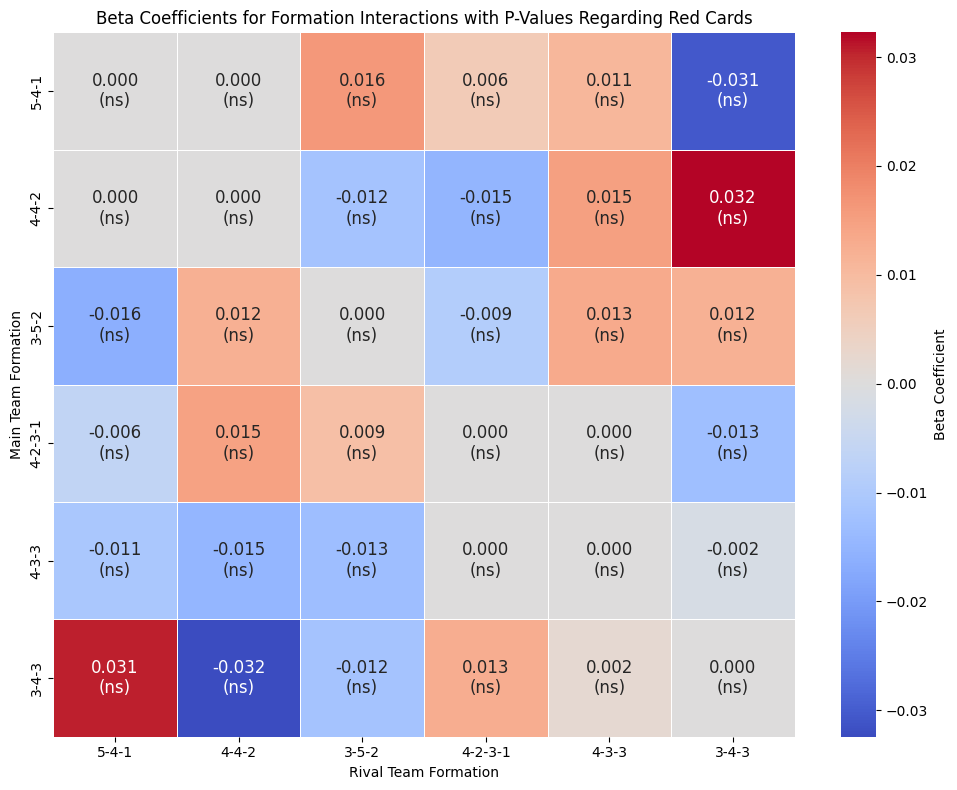

In [38]:
def create_beta_matrix(betas, sorted_formations):
    """
    Creates a matrix of beta coefficients from a list, where rows and columns
    represent main and rival team formations.

    Args:
        betas (list-like): List of beta coefficients (excluding the intercept).
        sorted_formations (list): List of formation labels, sorted.

    Returns:
        pd.DataFrame: A DataFrame representing the beta matrix with formations
                      as index and columns. The last cell is set to NaN for
                      better visualization.
    """
    n = len(sorted_formations)
    beta_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == n - 1 and j == n - 1:  # Last formation
                beta_matrix[i, j] = np.nan  # Use NaN for the last cell
            else:
                # beta_matrix[i, j] = betas[i * n + j + 1]  # +1 to skip intercept
                beta_matrix[i, j] = betas[i * n + j]  # NO INTERCEPT

                

    beta_df = pd.DataFrame(beta_matrix, index=sorted_formations, columns=sorted_formations)
    beta_df.index.name = "main_team_formation"
    beta_df.columns.name = "rival_team_formation"
    return beta_df


beta_df = create_beta_matrix(betas, sorted_formations)
beta_df.iloc[-1, -1] = -betas.sum()
beta_df = beta_df.applymap(lambda x: 0 if pd.notna(x) and abs(x) < 1e-3 else x)

# Visualize the beta matrix using seaborn heatmap with p-values
plt.figure(figsize=(10, 8))

# Create a new DataFrame for annotations with coefficients and p-values
annotations = beta_df.copy()
for i, row in enumerate(beta_df.index):
    for j, col in enumerate(beta_df.columns):
        if not pd.isna(beta_df.loc[row, col]):
            beta_key = f"beta{i * len(beta_df.columns) + j + 1}"  # Construct the beta key
            if beta_key in pvalue_dict:
                pvalue_annotation = pvalue_dict[beta_key][1]  # Get the significance level (e.g., "***")
                annotations.loc[row, col] = f"{beta_df.loc[row, col]:.3f}\n({pvalue_annotation})"
            else:
                annotations.loc[row, col] = f"{beta_df.loc[row, col]:.3f}"

sns.heatmap(beta_df, annot=annotations, fmt="", cmap='coolwarm', linewidths=.6, cbar_kws={'label': 'Beta Coefficient'},annot_kws={"size": 12})
# plt.title("Beta Coefficients for Formation Interactions with P-Values Regarding Red Cards (Home vs Away)")
# plt.ylabel("Home Team Formation")
# plt.xlabel("Away Team Formation")
plt.title("Beta Coefficients for Formation Interactions with P-Values Regarding Red Cards")
plt.ylabel("Main Team Formation")
plt.xlabel("Rival Team Formation")
plt.tight_layout()
plt.show()


In [30]:
betas

x1    -0.012176
x2     0.019310
x3    -0.060642
x4     0.003345
x5     0.001452
x6    -0.013736
x7     0.018203
x8     0.023983
x9     0.001921
x10    0.010646
x11   -0.013156
x12   -0.028220
x13   -0.024750
x14   -0.024762
x15   -0.009330
x16    0.014647
x17   -0.011641
x18   -0.012759
x19    0.012084
x20   -0.018082
x21   -0.003456
x22    0.023076
x23   -0.000706
x24    0.008737
x25    0.025877
x26    0.016062
x27    0.018411
x28   -0.002575
x29    0.015675
x30    0.020123
x31   -0.064118
x32    0.039401
x33    0.012774
x34   -0.018270
x35    0.014058
dtype: float64

In [31]:
betas.sum()

-0.018597199716714884